In [ ]:
import gc
gc.collect()


0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/data/data.csv')
sample_size = min(100000, len(df))

df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


In [ ]:
df.isnull().sum()

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(100000, 19)

In [ ]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.910,1977,0.500,['Idris Muhammad'],0.894,273067,0.5210,0,0KdzyvsBqX1HV3uLxGm2JV,0.772,4,0.068,-7.048,1,Camby Bolongo,34,1977,0.0847,126.805
1,0.583,1976,0.930,['Stan Getz'],0.585,182200,0.2720,0,1f4eO5waC6glPLXUhYKLm2,0.115,11,0.128,-16.693,0,Just One of Those Things,26,1976,0.0802,90.104
2,0.647,1994,0.157,"['Warren G', 'The Twinz']",0.878,179933,0.5200,1,1X07ZfF5KQt8dyJ5kAkVAQ,0.000,7,0.173,-12.609,1,Recognize,38,1994-06-07,0.4030,90.744
3,0.196,1957,0.937,['Red Garland Quintet'],0.463,925947,0.2870,0,5wmMDeM4qvLfwqLa2cvoks,0.837,0,0.112,-11.758,0,Soul Junction,13,1957,0.0363,186.764
4,0.422,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["valence", "danceability", "tempo",
                      "acousticness", "liveness", "speechiness", "instrumentalness"]

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

df_scaled


,valence,danceability,tempo,acousticness,liveness,speechiness,instrumentalness
0,1.450705,2.022673,0.325108,-0.004747,-0.789223,-0.086988,1.935012
1,0.208103,0.268863,-0.869485,1.138219,-0.446364,-0.114403,-0.164607
2,0.451303,1.931861,-0.848653,-0.916462,-0.189219,1.852185,-0.532120
3,-1.262500,-0.423580,2.276733,1.156826,-0.537793,-0.381854,2.142736
4,-0.403698,0.626436,-1.459474,1.310993,-0.537793,0.036686,2.171498
...,...,...,...,...,...,...,...
99995,-0.384698,-0.871965,-0.591742,0.851149,0.347927,-0.343473,-0.527262
99996,0.310703,0.484542,0.858201,-0.321056,-0.452078,-0.423282,-0.532120
99997,-0.696299,1.443746,0.685819,-1.182534,-0.143505,2.004492,-0.532089
99998,-1.137099,-0.514392,-0.841135,-1.331810,-0.610936,0.061055,-0.456380


# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_scaled,test_size=0.2,random_state=42)

Elbow Method Plot
To find optimal K

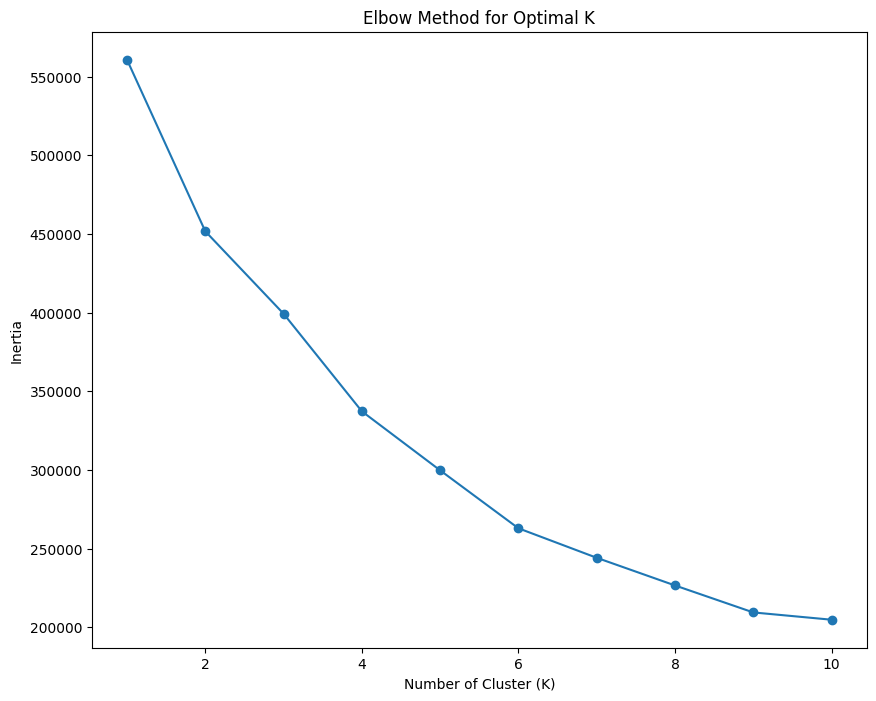

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


## **Applying Kmeans**

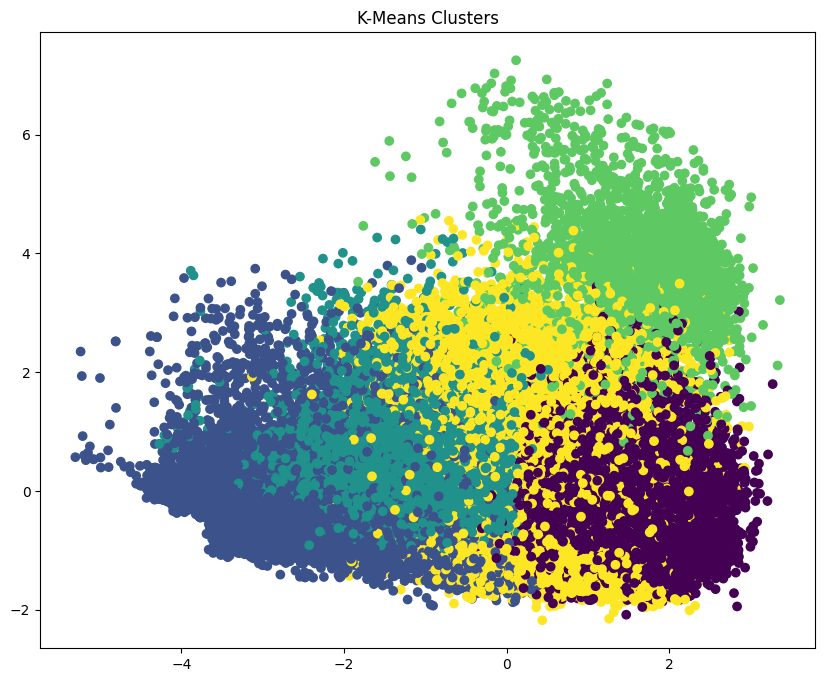

In [ ]:
# Apply K-Means clustering with optimal k 
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df["Cluster"], cmap="viridis")
plt.title("K-Means Clusters")
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, num_recommendations=5):
    # Get the cluster of the input song
    song_cluster = df[df["name"] == song_name]["Cluster"].values[0]

    # Filter songs from the same cluster
    same_cluster_songs = df[df["Cluster"] == song_cluster]

    # Calculate similarity within the cluster
    song_index = same_cluster_songs[same_cluster_songs["name"] == song_name].index[0]
    cluster_features = same_cluster_songs[numerical_features]
    similarity = cosine_similarity(cluster_features, cluster_features)

    # Get top recommendations
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations + 1):-1][::-1]
    recommendations = same_cluster_songs.iloc[similar_songs][["name", "year", "artists"]]

    return recommendations

In [ ]:
# Example usage
import pandas as pd

input_song = "Camby Bolongo"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

Songs similar to 'Camby Bolongo':


,name,year,artists
80300,"Dinorah, Dinorah",1980,['George Benson']
34934,Westchester Lady,1976,['Bob James']
31671,Some People,1988,['Belouis Some']
42436,Manifest Destiny - Remastered,1994,['Jamiroquai']
28951,It's More Fun to Compute - 2009 Remaster,1981,['Kraftwerk']


In [ ]:
# Example usage
input_song = "Soul Junction"
recommended_songs = recommend_songs(input_song, df, num_recommendations=5)

print(f"Songs similar to '{input_song}':")
recommended_songs

Songs similar to 'Soul Junction':


,name,year,artists
94697,April Love,1958,['Roger Williams']
59957,"Suite symphonique, No. 2, Op. 57 ""Protée"": III...",1945,"['Darius Milhaud', 'Pierre Monteux']"
22027,"Symphony No. 6 in F Major, Op. 68 ""Pastoral"": ...",1930,"['Ludwig van Beethoven', 'Staatskapelle Berlin..."
87937,"Mazurka in C-Sharp Minor, Op. 41, No. 4",1928,"['Frédéric Chopin', 'Vladimir Horowitz']"
97151,Concerto No. 2 for Piano and Orchestra in B-Fl...,1946,"['Johannes Brahms', 'Eugene Ormandy', 'Philade..."


In [ ]:
# save df
df.to_csv("clustered_df.csv")
from google.colab import files
files.download("clustered_df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
import sklearn
import sys

print("Python version:", sys.version)
print("scikit-learn version:", sklearn.__version__)

# Save the model
joblib.dump(kmeans, "kmeans_model.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")


Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
scikit-learn version: 1.6.1


['scaler.pkl']

In [ ]:
from google.colab import files
files.download("kmeans_model.pkl")
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>